In [95]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [96]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
exchange_rates.shape

(6456, 41)

In [97]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-12-15,1.6324,1.9558,5.4085,1.4653,0.9488,7.7812,NaN,24.477,7.4556,...,4.9710,NaN,11.2125,1.456,NaN,NaN,38.119,31.7965,1.0946,19.9801
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441


In [98]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

In [109]:
exchange_rates.rename(columns={'Period\\Unit:':'Time','[US dollar ]':'USD'},inplace=True)

In [110]:
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

In [111]:
exchange_rates.sort_values('Time', inplace=True)

In [113]:
euro_to_usd = exchange_rates[['Time','USD']].copy()
euro_to_usd['USD'].value_counts()

-         62
1.2276     9
1.1215     8
1.0808     7
1.0888     7
          ..
1.2437     1
0.9920     1
1.3330     1
1.5639     1
1.5990     1
Name: USD, Length: 3769, dtype: int64

In [115]:
euro_to_usd = euro_to_usd[euro_to_usd['USD'] != '-']
euro_to_usd['USD'] = euro_to_usd['USD'].astype(float)
euro_to_usd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 6455 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    6394 non-null   datetime64[ns]
 1   USD     6394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.9 KB


In [116]:
import matplotlib.pyplot as plt

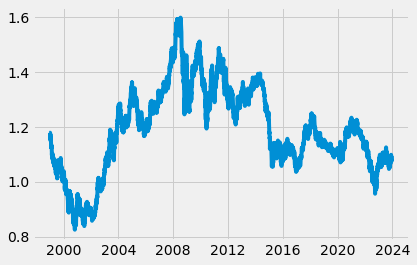

In [118]:
plt.plot(euro_to_dollar['Time'], euro_to_usd['USD'])
plt.show()

In [119]:
values = pd.DataFrame()
values['daily_values'] = pd.Series(range(1,20,2))
values


,daily_values
0,1
1,3
2,5
3,7
4,9
5,11
6,13
7,15
8,17
9,19


In [120]:
values['rolling_mean_2'] = values['daily_values'].rolling(2).mean()
values

,daily_values,rolling_mean_2
0,1,NaN
1,3,2.0
2,5,4.0
3,7,6.0
4,9,8.0
5,11,10.0
6,13,12.0
7,15,14.0
8,17,16.0
9,19,18.0


In [121]:
values['rolling_mean_3'] = values['daily_values'].rolling(3).mean()
values['rolling_mean_5'] = values['daily_values'].rolling(5).mean()
values

,daily_values,rolling_mean_2,rolling_mean_3,rolling_mean_5
0,1,NaN,NaN,NaN
1,3,2.0,NaN,NaN
2,5,4.0,3.0,NaN
3,7,6.0,5.0,NaN
4,9,8.0,7.0,5.0
5,11,10.0,9.0,7.0
6,13,12.0,11.0,9.0
7,15,14.0,13.0,11.0
8,17,16.0,15.0,13.0
9,19,18.0,17.0,15.0


In [122]:
euro_to_usd['Rolling_30'] = euro_to_usd['USD'].rolling(30).mean()

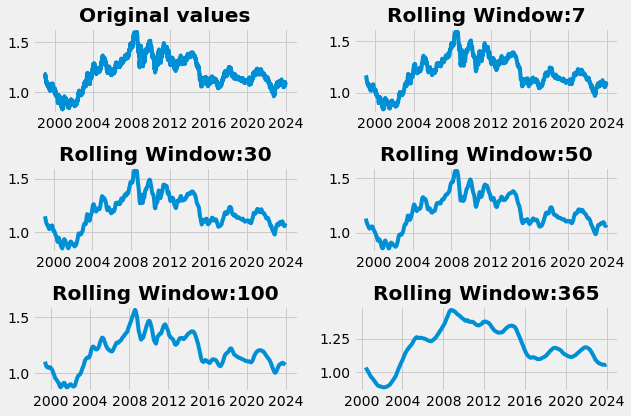

In [123]:
plt.figure(figsize=(9,6))
plt. subplot (3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar']) 
plt.title('Original values', weight='bold') 
for i, rolling_mean in zip([2, 3, 4,5, 6],
                           [7, 30, 50, 100,365]):
    plt. subplot (3, 2,i)
    plt.plot(euro_to_dollar['Time'],
        euro_to_dollar ['US_dollar'].rolling(rolling_mean) .mean())
    plt.title('Rolling Window:'+ str(rolling_mean), weight='bold') 
plt.tight_layout() # Auto-adjusts the padding between subplots 
plt. show()

In [124]:
euro_to_usd['Rolling_30'] = euro_to_usd['USD'].rolling(30).mean()
euro_to_dollar['rolling_mean_365'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean_365
6455,1999-01-04,1.1789,NaN
6454,1999-01-05,1.1790,NaN
6453,1999-01-06,1.1743,NaN
6452,1999-01-07,1.1632,NaN
6451,1999-01-08,1.1659,NaN
...,...,...,...
4,2023-12-11,1.0757,1.080143
3,2023-12-12,1.0804,1.080760
2,2023-12-13,1.0787,1.081593
1,2023-12-14,1.0919,1.082453


In [125]:
crisis = euro_to_usd.copy()[(euro_to_usd['Time'].dt.year >= 2006) & (euro_to_usd['Time'].dt.year <= 2009)]
crisis_7_8 = euro_to_usd.copy()[(euro_to_usd['Time'].dt.year >= 2007) & (euro_to_usd['Time'].dt.year <= 2008)]


In [126]:
crisis

,Time,USD,Rolling_30
4630,2006-01-02,1.1826,1.183087
4629,2006-01-03,1.1875,1.183300
4628,2006-01-04,1.2083,1.184573
4627,2006-01-05,1.2088,1.185613
4626,2006-01-06,1.2093,1.186647
...,...,...,...
3592,2009-12-24,1.4398,1.477640
3590,2009-12-28,1.4405,1.476097
3589,2009-12-29,1.4433,1.474323
3588,2009-12-30,1.4338,1.472533


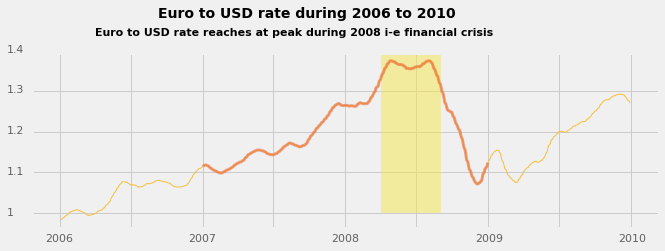

In [127]:
import matplotlib.style as style
style.use('fivethirtyeight')

fig,ax = plt.subplots(figsize=(10,3))
ax.plot(crisis['Time'],crisis['Rolling_30'], linewidth = 1, color = '#f5bf42')
ax.plot(crisis_7_8['Time'],crisis_7_8['Rolling_30'],linewidth = 3, color = '#eb6534',alpha=0.6)

ax.set_xticklabels([])

x=0.02
for year in ['2006','2007','2008','2009','2010',]:
    ax.text(x,-0.08, year, alpha =0.6, fontsize=11, transform=plt.gca().transAxes)
    x += 0.22888

ax.set_yticklabels([])
y=0.07
for rate in ['1','1.1','1.2','1.3','1.4']:
    ax.text(-0.04,y,rate,alpha =0.6, fontsize=11, transform=plt.gca().transAxes)
    y += 0.2333
    
ax.text(0.2,1.2, "Euro to USD rate during 2006 to 2010", weight='bold',transform = plt.gca().transAxes)
ax.text(0.1,1.1, "Euro to USD rate reaches at peak during 2008 i-e financial crisis", weight='bold',size = 11, transform = plt.gca().transAxes)

ax.axvspan(xmin=pd.to_datetime("2008-04-1"), xmax=pd.to_datetime("2008-09-1"),ymin=0.09, color='#f5e74e',alpha=0.5)
plt.show()

#### Euro to USD Rate During Covid

In [128]:
covid_20 = euro_to_usd.loc[(euro_to_usd['Time'] >= '2020-01-01') & (euro_to_usd['Time'] <= '2020-12-31')]
covid = euro_to_usd.loc[(euro_to_usd['Time'] >= '2016-01-01') & (euro_to_usd['Time'] <= '2019-12-31')]

In [129]:
covid_20.head()

,Time,USD,Rolling_30
1018,2020-01-02,1.1193,1.109237
1017,2020-01-03,1.1147,1.109470
1016,2020-01-06,1.1194,1.109920
1015,2020-01-07,1.1172,1.110190
1014,2020-01-08,1.1115,1.110380


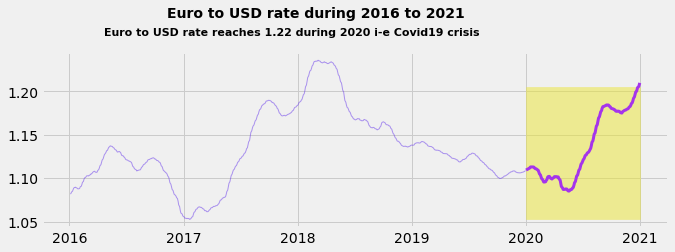

In [130]:
import matplotlib.style as style
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(10,3))
ax.plot(covid['Time'],covid['Rolling_30'],linewidth=1,color='#6434eb', alpha = 0.5)
ax.plot(covid_20['Time'],covid_20['Rolling_30'],linewidth=3,color='#a534eb')

ax.text(0.2,1.2, "Euro to USD rate during 2016 to 2021", weight='bold',transform = plt.gca().transAxes)
ax.text(0.1,1.1, "Euro to USD rate reaches 1.22 during 2020 i-e Covid19 crisis", weight='bold',size = 11, transform = plt.gca().transAxes)

ax.axvspan(xmin=pd.to_datetime("2020-01-1"), xmax=pd.to_datetime("2020-12-31"),ymin=0.05,ymax=0.8, color='#ebe534',alpha=0.5)

plt.show()

#### Euro to USD Rate During Different Govt

In [131]:
all_3 = euro_to_usd.copy()[(euro_to_usd['Time'].dt.year >= 2001) & (euro_to_usd['Time'].dt.year < 2021)]
bush = all_3.copy()[(all_3['Time'].dt.year < 2009)]
obama = all_3.copy()[all_3['Time'].dt.year >= 2009 & (all_3['Time'].dt.year < 2017)]
trump = all_3.copy()[all_3['Time'].dt.year >= 2017 & (all_3['Time'].dt.year < 2021)]

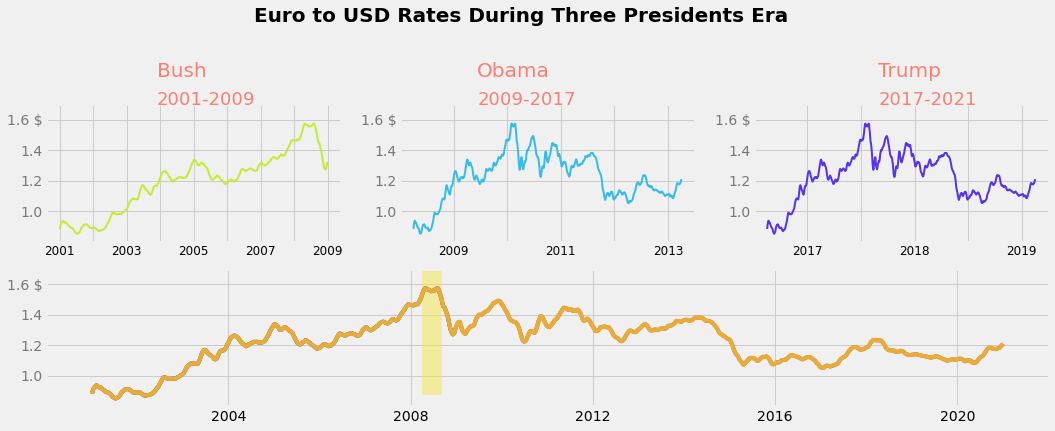

In [133]:
style.use('fivethirtyeight')

plt.figure(figsize=(16,8))

# for subplots
ax1 = plt.subplot(3,3,1)
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)

#for large plot
ax4 = plt.subplot(3,1,2)

axes = [ax1,ax2,ax3,ax4]
for ax in axes:
    ax.set_ylim(0.8,1.7)
    ax.set_yticks([1.0,1.2,1.4,1.6])
    ax.set_yticklabels(['1.0','1.2','1.4','1.6 $'],alpha=0.5)

#Bush
ax1.plot(bush['Time'],bush['Rolling_30'],linewidth=2,color='#c6eb34')
ax1.set_xticklabels(['','2001','','2003','','2005','','2007','','2009'],fontsize=12)
ax1.text(0.11,2.4,'Bush',fontsize=20,color='salmon',transform=plt.gca().transAxes)
ax1.text(0.11,2.2,'2001-2009',fontsize=18,color='salmon',transform=plt.gca().transAxes)

#Obama
ax2.plot(obama['Time'],obama['Rolling_30'],linewidth=2,color='#34bdeb')
ax2.set_xticklabels(['','2009','','2011','','2013','','2015','','2017'],fontsize=12)
ax2.text(0.43,2.4,'Obama',fontsize=20,color='salmon',transform=plt.gca().transAxes)
ax2.text(0.43,2.2,'2009-2017',fontsize=18,color='salmon',transform=plt.gca().transAxes)

#Trump
ax3.plot(trump['Time'],trump['Rolling_30'],linewidth=2,color='#5634eb')
ax3.set_xticklabels(['','2017','','2018','','2019','','2020','','2021'],fontsize=12)
ax3.text(0.83,2.4,'Trump',fontsize=20,color='salmon',transform=plt.gca().transAxes)
ax3.text(0.83,2.2,'2017-2021',fontsize=18,color='salmon',transform=plt.gca().transAxes)

#merging
ax4.plot(bush['Time'],bush['Rolling_30'])
ax4.plot(obama['Time'],obama['Rolling_30'])
ax4.plot(trump['Time'],trump['Rolling_30'])

ax1.text(0.2, 2.8, ' Euro to USD Rates During Three Presidents Era', fontsize=20, weight='bold', transform=plt.gca().transAxes)
ax.axvspan(xmin=pd.to_datetime("2008-04-1"), xmax=pd.to_datetime("2008-09-1"),ymin=0.09, color='#f5e74e',alpha=0.5)
plt.show()